In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [451]:
# P(Y = 0) = 0.95
p0 = 0.95
p1 = (1 - p0)
# P(X = 0| Y)
mean0 = 0
mean1 = 1
var0 = 1
var1 = 1
# f = lambda mean, var,x : math.exp(-0.5*((x-mean)**2/var))/(2*math.pi*var)**0.5
# f0 = lambda x : f(mean0,var0,x)
# f1 = lambda x : f(mean1,var1,x)

In [452]:
def dataset_2Class(N,p0,mean0,var0,mean1,var1):
    dataset = np.zeros(N)
    y = np.zeros(N)
    for i in range(N):
        r = np.random.rand()
        if(r < p0):
            dataset[i] = np.random.normal(mean0,var0**0.5)
            y[i] = 0
        else:
            dataset[i] = np.random.normal(mean1,var1**0.5)
            y[i] = 1
    return dataset,y

x,y = dataset_2Class(1000,p0,mean0,var0,mean1,var1)
        

In [453]:
#assuming variance1 = variance0
#else quadratic roots
p0_est = 0
mean0_est = 0
mean1_est = 0
for i in range(x.shape[0]):
    if y[i] == 0:
        p0_est += 1
        mean0_est += x[i]
    else:
        mean1_est += x[i]
p0_est /= x.shape[0]
p1_est = (1-p0_est)
mean0_est /= x.shape[0]
mean1_est /= x.shape[0]

var0_est = 0
var1_est = 0
for i in range(x.shape[0]):
    if y[i] == 0:
        var0_est += (x[i] - mean0_est)**2
    else:
        var1_est += (x[i] - mean1_est)**2
        
var0_est /= x.shape[0] 
var1_est /= x.shape[0] 

boundary = (2*math.log((p0_est/p1_est)*(var1_est/var0_est)**0.5) - mean0_est**2*var1_est + mean1_est**2*var0_est)/(2*(mean1_est*var0_est - mean0_est*var1_est))
def bayesClassifier(x):
    #print(boundary)
    if(x >= boundary):
        return 1
    else:
        return 0

In [454]:
def labelEst(x,classifier):
    label = np.zeros(x.shape[0])
    for i in range(label.shape[0]):
        label[i] = classifier(x[i])
    return label

In [455]:
boundary

31.65523841155907

In [456]:
test_x,test_y =dataset_2Class(10000,p0,mean0,var0,mean1,var1)
bayes_label = labelEst(test_x,bayesClassifier)

In [457]:
def FalsePositive(estLabel,actualLabel):
    sum = 0
    for i in range(actualLabel.shape[0]):
        if estLabel[i] == 1 and actualLabel[i] == 0:
            sum += 1
    return sum

In [458]:
def TruePositive(estLabel,actualLabel):
    sum = 0
    for i in range(actualLabel.shape[0]):
        if estLabel[i] == 1 and actualLabel[i] == 1:
            sum += 1
    return sum

In [459]:
def TrueNegative(estLabel,actualLabel):
    sum = 0
    for i in range(actualLabel.shape[0]):
        if estLabel[i] == 0 and actualLabel[i] == 0:
            sum += 1
    return sum

In [460]:
def FalseNegative(estLabel,actualLabel):
    sum = 0
    for i in range(actualLabel.shape[0]):
        if estLabel[i] == 0 and actualLabel[i] == 1:
            sum += 1
    return sum

In [461]:
def Accuracy(estLabel,actualLabel):
    sum = 0
    for i in range(actualLabel.shape[0]):
        if estLabel[i] == actualLabel[i]:
            sum += 1
    return sum

In [462]:
print("TP % for bayes Classifier:",TruePositive(bayes_label,test_y)/bayes_label.shape[0])
print("TN % for bayes Classifier:",TrueNegative(bayes_label,test_y)/bayes_label.shape[0])
print("FP % for bayes Classifier:",FalsePositive(bayes_label,test_y)/bayes_label.shape[0])
print("FN % for bayes Classifier:",FalseNegative(bayes_label,test_y)/bayes_label.shape[0])
print("Accuracy % for bayes Classifier:",Accuracy(bayes_label,test_y)/bayes_label.shape[0])


TP % for bayes Classifier: 0.0
TN % for bayes Classifier: 0.9464
FP % for bayes Classifier: 0.0
FN % for bayes Classifier: 0.0536
Accuracy % for bayes Classifier: 0.9464


### (d)

In [463]:
#type I error = False positive  = P(1|0)  = P(hat|actual)
#type II error = False negative = P(0|1)

In [464]:
#Neyman Peason Classifier:
# minimize False Negative 
# contraint that Prob(False Positive) < delta (0.1)

def NeymanClassifier(x,alpha):
    #print(boundary)
    if(x >= alpha):
        return 1
    else:
        return 0

In [465]:
def labelEst(x,classifier,alpha):
    label = np.zeros(x.shape[0])
    for i in range(label.shape[0]):
        label[i] = classifier(x[i],alpha)
    return label

In [466]:
accuracy = []
tpr = []
fpr = []
alpha_ = []
alpha = -40
while(alpha < 40):
    neyman_label = labelEst(x,NeymanClassifier,alpha)
    accuracy_neyman = Accuracy(neyman_label,y)
    fp = FalsePositive(neyman_label,y)
    fn = FalseNegative(neyman_label,y)
    tp = TruePositive(neyman_label,y)
    tn = TrueNegative(neyman_label,y)
    tpr.append(tp/(tp + fn))
    fpr.append(fp/(fp+tn))
    accuracy.append(accuracy_neyman/neyman_label.shape[0])

    alpha_.append(alpha)
    alpha += 0.1


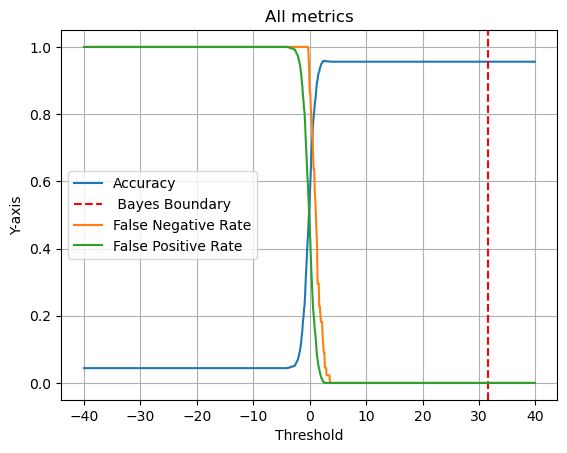

In [467]:
plt.plot(alpha_,accuracy, label=f'Accuracy')
plt.axvline(x=boundary, color='r', linestyle='--', label=f' Bayes Boundary')
plt.plot(alpha_,tpr, label=f'False Negative Rate')
plt.plot(alpha_,fpr, label=f'False Positive Rate')

plt.xlabel('Threshold')
plt.ylabel('Y-axis')
plt.title('All metrics')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

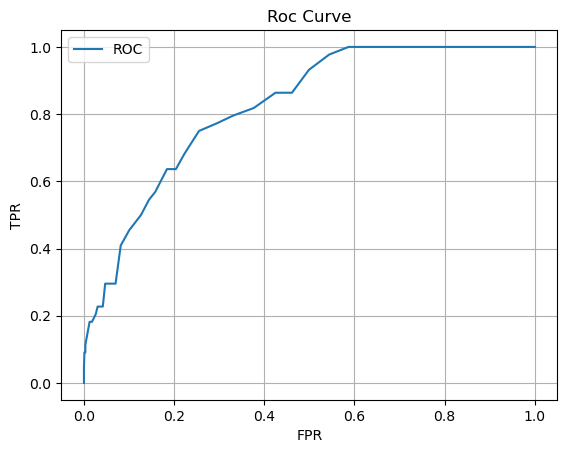

In [468]:
plt.plot(fpr,tpr, label=f'ROC')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Roc Curve')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

### (e)

In [469]:
x,y = dataset_2Class(1000,p0,mean0,var0,mean1,var1)

In [470]:
import sys
def min_max_train(x,y):
    max0 = sys.float_info.min
    max1 = sys.float_info.min
    min0 =  sys.float_info.max
    min1 = sys.float_info.max
    for i in range(x.shape[0]):
        if y[i] == 0:
            min0 = min(x[i],min0)
            max0 = max(x[i],max0)
        else:
            min1 = min(x[i],min1)
            max1 = max(x[i],max1)
    return min0,max0,min1,max1

In [471]:
def distance(x1,x2):
    return ((x1-x2)**2)**0.5

In [472]:
def min_max_test(min0,max0,min1,max1,x):
    if distance(min0,x) < distance(min1,x) and distance(max0,x) > distance(max1,x):
        return 0
    elif distance(min0,x) > distance(min1,x) and distance(max0,x) < distance(max1,x):
        return 1
    else:
        #undeterminable
        return -1


In [473]:
mn0,mx0,mn1,mx1 = min_max_train(x,y)

In [474]:
label_est = []
for i in range(x.shape[0]):
    lab = min_max_test(mn0,mx0,mn1,mx1,x[i])
    label_est.append(lab)

In [475]:
label_est

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 